Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Introdução à Análise de Dados em Saúde com Python**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

Mais informações: https://ciia-saude.medicina.ufmg.br/

# Estatística Inferencial - Concordâncias

*   Análise de Concordância Kappa (variáveis categóricas)
*   Análise de Concordância ICC (variáveis numéricas)

In [1]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

import scipy.stats as stats
import sklearn.metrics as sklm

# Abrir o arquivo

In [2]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS.xlsx'

# Ler o arquivo - sem a primeira coluna
dados = pd.read_excel(arquivo)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1708 non-null   int64         
 1   DT_INTERNACAO       1708 non-null   datetime64[ns]
 2   DT_ALTA             1708 non-null   datetime64[ns]
 3   DURACAO_INT         1708 non-null   int64         
 4   GESTACOES           1708 non-null   int64         
 5   PARTOS              1707 non-null   float64       
 6   IG_OBSTETRA         1686 non-null   float64       
 7   IG_PEDIATRA         1704 non-null   float64       
 8   ALTO_RISCO          1708 non-null   object        
 9   TIPO_PARTO          1708 non-null   object        
 10  HIPERTENSAO         1708 non-null   object        
 11  GEMELAR             1708 non-null   object        
 12  CESAREAS_PREVIAS    1701 non-null   float64       
 13  EPISIOTOMIA         1708 non-null   object      

# Análises de Concordância (Kappa e ICC)

*   Análise de Concordância Kappa (variáveis categóricas)
*   Análise de Concordância ICC (variáveis numéricas)

**Utilização:**

As análises de concordância podem ser feitas intra-observador e inter-observador:

* intra-observador (observador comparado com ele mesmo)
* inter-observador (observador comparado com outro observador)

Recomenda-se que essas análises sejam feitas no início do estudo, com até 20% da amostra coletada.
* Se houver concordância (intra e inter) entre os avaliadores (acima de 75%), dá-se seguimento a coleta;
* Ou, se não haver concordância mínima de 75%, deve-se avaliar qual a melhor estratégia para resolver o problema, como refazer o treinamento, rever a metodologia de coleta, calibrar os equipamentos, para depois reiniciar a coleta do zero.

No caso de avaliar a intra-observação (mesmo avaliador), entre a medida inicial e a segunda medida, a literatura geralmente recomenda um tempo para que o avaliador "esqueça" os valores coletados/anotados entre a primeira e segunda leitura (para o mesmo paciente), algo que na prática é bem complexo/tempo/custo de fazer.

# Kappa de Cohen para variáveis categóricas

**Exemplo 1: Existem concordância entre os diagnósticos de prematuridade feitos pelo obstetra e pelo pediatra?**

In [3]:
# Selecionar os nomes das variáveis  (PREMATURO_OBS, PREMATURO_PED)
variavel1 = 'PREMATURO_OBS'
variavel2 = 'PREMATURO_PED'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[variavel1, variavel2])

# Definição das variáveis
juiz1 = dados2[variavel1].values
juiz2 = dados2[variavel2].values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

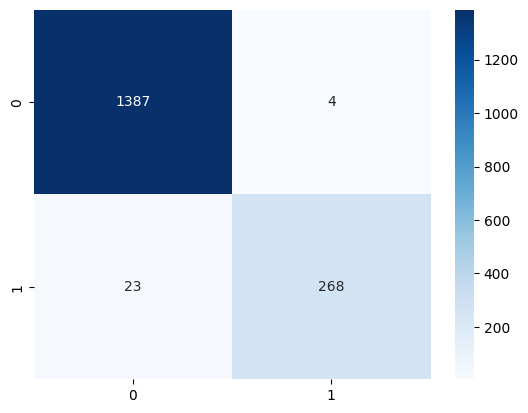

In [4]:
# Calcular o Kappa de Cohen
kappa = sklm.cohen_kappa_score(juiz1, juiz2)

# Calcular a matriz de confusão
matrizconf = sklm.confusion_matrix(juiz1, juiz2)

# Mostrar a matriz de confusão, com o gráfico mapa de calor
sns.heatmap(matrizconf, annot=True, cmap='Blues', fmt="d")

# para salvar/preparar a figura (depois baixar)
nome_arquivo = 'FiguraAtividade_8.jpg'
plt.savefig(nome_arquivo, format='jpg', dpi=300)
files.download(nome_arquivo)

In [5]:
# Para fazer um código para fazer a interpretação do Kappa automaticamente, segundo Vieira e Garrett (2005)
print('Teste de Concordância - Kappa de Cohen')
print('Kappa de Cohen:', kappa.round(3))

Teste de Concordância - Kappa de Cohen
Kappa de Cohen: 0.942


In [6]:
# interpretação do Kappa
if kappa < 0.01:
    print('Concordância menor que o acaso')
elif ( (kappa >= 0.01) & (kappa <= 0.20) ):
    print('Concordância muito fraca')
elif ( (kappa > 0.20) & (kappa <= 0.40) ):
    print('Concordância fraca')
elif ( (kappa > 0.40) & (kappa <= 0.60) ):
    print('Concordância moderada')
elif ( (kappa > 0.60) & (kappa <= 0.80) ):
    print('Concordância substancial')
else:
  print('Concordância quase perfeita')

print()

Concordância quase perfeita



**Exemplo 2: Existem concordância entre idades gestacionais informadas pelo obstetra e pelo pediatra?**

In [7]:
# Selecionar os nomes das variáveis  (IG_OBSTETRA, IG_PEDIATRA)
variavel1 = 'IG_OBSTETRA'
variavel2 = 'IG_PEDIATRA'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[variavel1, variavel2])

# Definição das variáveis
juiz1 = dados2[variavel1].values
juiz2 = dados2[variavel2].values

Teste de Concordância - Kappa de Cohen
Kappa de Cohen: 0.864
Concordância quase perfeita



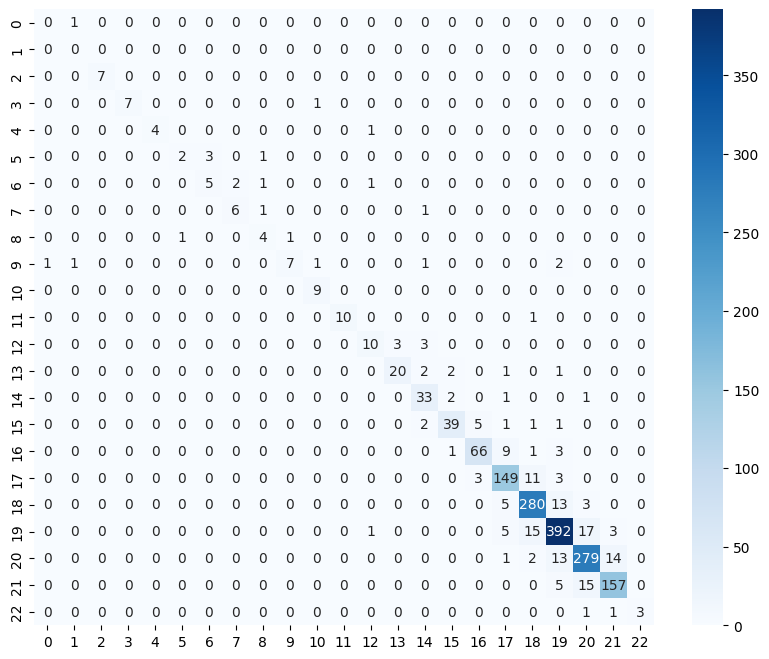

In [8]:
# Calcular o Kappa de Cohen
kappa = sklm.cohen_kappa_score(juiz1, juiz2)

# Calcular a matriz de confusão
matrizconf = sklm.confusion_matrix(juiz1, juiz2)

# Mostrar a matriz de confusão, com o gráfico mapa de calor
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrizconf, annot=True, cmap='Blues', fmt="d")

# Para fazer um código para fazer a interpretação do Kappa automaticamente, segundo Vieira e Garrett (2005)
print('Teste de Concordância - Kappa de Cohen')
print('Kappa de Cohen:', kappa.round(3))

# interpretação do Kappa
if kappa < 0.01:
    print('Concordância menor que o acaso')
elif ( (kappa >= 0.01) & (kappa <= 0.20) ):
    print('Concordância muito fraca')
elif ( (kappa > 0.20) & (kappa <= 0.40) ):
    print('Concordância fraca')
elif ( (kappa > 0.40) & (kappa <= 0.60) ):
    print('Concordância moderada')
elif ( (kappa > 0.60) & (kappa <= 0.80) ):
    print('Concordância substancial')
else:
  print('Concordância quase perfeita')

print()

**Exemplo 3: Existem concordância entre diagnóstico de baixo Apgar feito ao 1º minuto e do 5º minuto?**

In [9]:
# Selecionar os nomes das variáveis  (BAIXO_APGAR1, BAIXO_APGAR5)
variavel1 = 'BAIXO_APGAR1'
variavel2 = 'BAIXO_APGAR5'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[variavel1, variavel2])

# Definição das variáveis
juiz1 = dados2[variavel1].values
juiz2 = dados2[variavel2].values

Teste de Concordância - Kappa de Cohen
Kappa de Cohen: 0.332
Concordância fraca



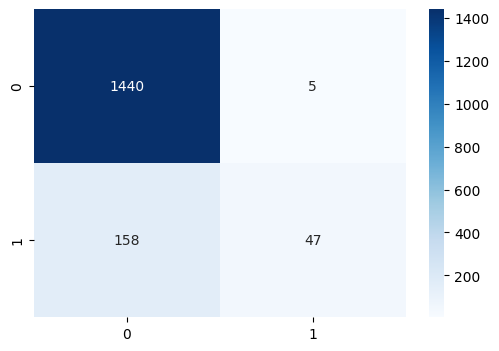

In [10]:
# Calcular o Kappa de Cohen
kappa = sklm.cohen_kappa_score(juiz1, juiz2)

# Calcular a matriz de confusão
matrizconf = sklm.confusion_matrix(juiz1, juiz2)

# Mostrar a matriz de confusão, com o gráfico mapa de calor
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(matrizconf, annot=True, cmap='Blues', fmt="d")

# Para fazer um código para fazer a interpretação do Kappa automaticamente, segundo Vieira e Garrett (2005)
print('Teste de Concordância - Kappa de Cohen')
print('Kappa de Cohen:', kappa.round(3))

# interpretação do Kappa
if kappa < 0.01:
    print('Concordância menor que o acaso')
elif ( (kappa >= 0.01) & (kappa <= 0.20) ):
    print('Concordância muito fraca')
elif ( (kappa > 0.20) & (kappa <= 0.40) ):
    print('Concordância fraca')
elif ( (kappa > 0.40) & (kappa <= 0.60) ):
    print('Concordância moderada')
elif ( (kappa > 0.60) & (kappa <= 0.80) ):
    print('Concordância substancial')
else:
  print('Concordância quase perfeita')

print()

**Interpretações do Kappa: Viera and Joanne (2005)**

* 0.81 a 0.99: Concordância quase perfeita
* 0.61 a 0.80: Concordância substancial
* 0.41 a 0.60: Concordância moderada
* 0.21 a 0.40: Concordância fraca
* 0.01 a 0.20: Concordância muito fraca
* < 0.01     : Concordância menor que o acaso

Fonte: Viera, Anthony J., and Joanne M. Garrett. "Understanding interobserver agreement: the kappa statistic." Fam Med 37, no. 5 (2005): 360-363.

Saiba mais: https://seaborn.pydata.org/generated/seaborn.heatmap.html

Saiba mais: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html

Saiba mais: https://stackoverflow.com/questions/11528150/inter-rater-agreement-in-python-cohens-kappa

**Saiba mais:** *Viera, Anthony J., and Joanne M. Garrett. "Understanding interobserver agreement: the kappa statistic." Fam Med 37, no. 5 (2005): 360-363.* https://www.ncbi.nlm.nih.gov/pubmed/15883903:

https://fammedarchives.blob.core.windows.net/imagesandpdfs/fmhub/fm2005/May/Anthony360.pdf

# **Intraclass Correlation Coefficient (ICC) para variáveis numéricas**

Para executar o ICC os dados devem estar dispostos de forma diferente na tabela de dados dos exemplos anteriores.

Cada leitura do par paciente/equipamento deve ser uma linha da tabela e cada tipo de leitura ser indentificado em uma coluna específica.

In [11]:
# instalar a biblioteca pingouin (precisa instalar no servidor, pois não está disponível nos servidores da Google)
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.3 MB/s eta 0:00:00


In [12]:
# importar a biblioteca
import pingouin as pg

**Exemplo 1: Qual é o ICC (Coeficiente de Correlação Intraclasse) entre a idade gestacional informada pelo obstetra e pelo pediatra?**

In [13]:
# Endereço do arquivo com a base de dados
arquivo2 = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS_ICC_IG.xlsx'

# Ler o arquivo
dadosICCIG = pd.read_excel(arquivo2)
dadosICCIG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COD_PACIENTE  1578 non-null   int64 
 1   MEDICO        1578 non-null   object
 2   IG            1578 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 37.1+ KB


In [14]:
# Mostrar como o conteúdo está disposto
dadosICCIG

,COD_PACIENTE,MEDICO,IG
0,1,OBSTETRA,39
1,2,OBSTETRA,39
2,3,OBSTETRA,38
3,4,OBSTETRA,41
4,5,OBSTETRA,40
...,...,...,...
1573,785,PEDIATRA,38
1574,786,PEDIATRA,38
1575,787,PEDIATRA,37
1576,788,PEDIATRA,39


In [15]:
# Calcular o Coeficiente de Correlação Intraclasse
ICC = pg.intraclass_corr(data=dadosICCIG, targets='COD_PACIENTE', raters='MEDICO', ratings='IG')

# Mostrar o ICC
ICC

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.974722,78.118648,788,789,0.0,"[0.97, 0.98]"
1,ICC2,Single random raters,0.974723,78.490885,788,788,0.0,"[0.97, 0.98]"
2,ICC3,Single fixed raters,0.974840,78.490885,788,788,0.0,"[0.97, 0.98]"
3,ICC1k,Average raters absolute,0.987199,78.118648,788,789,0.0,"[0.99, 0.99]"
4,ICC2k,Average random raters,0.987200,78.490885,788,788,0.0,"[0.99, 0.99]"
5,ICC3k,Average fixed raters,0.987260,78.490885,788,788,0.0,"[0.99, 0.99]"


**Interpretação:** ICC1 = 0.97 --> Concordância Excelente entre os médicos

**Geralmente é mais usada a Concordância Média Absoluta: Avarege raters absolute (ICC1k).**

Esta função retorna os seguintes resultados:

*   Descrição: O tipo de ICC calculado (usar ICC1k)
*   ICC: O coeficiente de correlação intraclasse
*   F: O valor F do ICC
*   df1, df2: Os graus de liberdade associados ao valor F
*   pval: O p-value associado ao valor-F
*   CI95%: O intervalo de confiança de 95% para o ICC


**Resumo dos diferentes tipos de modelos ICC**

Observe que existem seis ICCs diferentes calculados aqui.
Isso ocorre porque existem vários ajustes ao calcular o ICC, dependendo das seguintes suposições:

* **ICC1:** cada um dos pacientes foi medido apenas por um subconjunto de avaliadores, e NÃO é o mesmo subconjunto de avaliadores que mediu cada paciente.
* **ICC2:** cada um dos pacientes foi medido apenas por um subconjunto de avaliadores, mas é o mesmo subconjunto de avaliadores que mediu cada paciente.
* **ICC3:** cada um dos pacientes foi medido por toda a população de avaliadores (portanto, não precisamos levar em consideração a variabilidade entre avaliadores)
* **ICC1k, ICC2k e ICC3k:** a confiabilidade dos k avaliadores (média) quando trabalham em grupo (enquanto ICC1, ICC2 e ICC3 representam a confiabilidade dos avaliadores como indivíduos). Esses valores sempre serão maiores, porque vários avaliadores trabalhando juntos sempre fornecerão um resultado estatisticamente mais confiável. Exemplo para avaliar confiabilidade do estudo como um todo, contando com todos os avaliadores do estudo, recomenda-se o ICC2k.


**Para estes exemplos, vamos usar o ICC1 (single rates absolute):** um grupo de médicos (obstetras e pediatras) não representa toda a população de médicos que poderiam avaliar o paciente, queremos saber a confiabilidade dos avaliadores como indivíduos.

**Interpretações do ICC: Cicchetti (1994)**

* 0.75 a 1.00: Excelente
* 0.60 a 0.75: Boa
* 0.40 a 0.60: Razoável
* < 0.40     : Pobre

Ciacchetti, Domenic V. (1994). "Guidelines, criteria, and rules of thumb for evaluating  normed and standardized assessment instruments in psychology". Psychological Assessment. 6(4):284-290.


**Interpretações do ICC: Koo and Li (2016)**

* 0.90 a 1.00: Excelente
* 0.75 a 0.90: Boa
* 0.50 a 0.75: Moderada
* < 0.50     : Pobre

Koo T, Li M. A Guideline of Selecting and Reporting Intraclass Correlation Coefficients for Reliability Research. Journal of Chiropractic Medicine. 2016;15(2):155-163

**Exemplo 2: Qual é o ICC (Coeficiente de Correlação Intraclasse) entre as medições dos equipamentos A e B?**

In [16]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS_ICC_EQ.xlsx'

# Ler o arquivo
dados = pd.read_excel(arquivo)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COD_PACIENTE  1578 non-null   int64 
 1   EQUIPAMENTO   1578 non-null   object
 2   VALOR         1578 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 37.1+ KB


In [17]:
# Mostrar como o conteúdo está disposto
dados

,COD_PACIENTE,EQUIPAMENTO,VALOR
0,1,A,2120
1,2,A,2095
2,3,A,2130
3,4,A,2050
4,5,A,2134
...,...,...,...
1573,785,B,4035
1574,786,B,4040
1575,787,B,4050
1576,788,B,4070


In [18]:
# Calcular o Coeficiente de Correlação Intraclasse
ICC = pg.intraclass_corr(data=dados, targets='COD_PACIENTE', raters='EQUIPAMENTO', ratings='VALOR')

# Mostrar o ICC
ICC

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.952811,41.383137,788,789,0.0,"[0.95, 0.96]"
1,ICC2,Single random raters,0.953015,50.704755,788,788,0.0,"[0.92, 0.97]"
2,ICC3,Single fixed raters,0.961319,50.704755,788,788,0.0,"[0.96, 0.97]"
3,ICC1k,Average raters absolute,0.975836,41.383137,788,789,0.0,"[0.97, 0.98]"
4,ICC2k,Average random raters,0.975942,50.704755,788,788,0.0,"[0.96, 0.98]"
5,ICC3k,Average fixed raters,0.980278,50.704755,788,788,0.0,"[0.98, 0.98]"


**Interpretação:** ICC1 = 0.95 --> Concordância Excelente entre os equipamentos

Saiba mais sobre ICC = https://www.statology.org/intraclass-correlation-coefficient-python/

Mais explicações sobre os resultados:
https://rowannicholls.github.io/python/statistics/agreement/intraclass_correlation.html#:~:text=The%20intraclass%20correlation%20coefficient%20(ICC)%20is%20a%20descriptive%20statistic%20that,same%20group%20resemble%20each%20other